In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


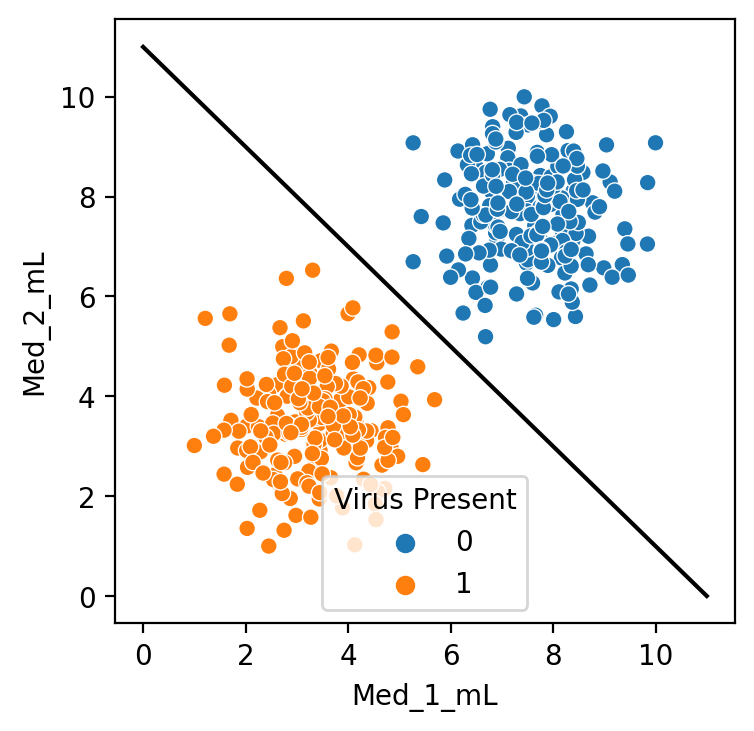

In [14]:
plt.figure(figsize = (4,4), dpi = 200)
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', data = df, hue = 'Virus Present');

# Creating a hyperplane

x = np.linspace(0,11,200)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'black')

In [15]:
from sklearn.svm import SVC

In [16]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [17]:
# We are skipping train_test_split and scaling

In [18]:
y = df['Virus Present']

In [19]:
X = df.drop('Virus Present', axis = 1)

In [21]:
model = SVC(kernel='linear', C = 1000)

In [22]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [1]:
from svm_margin_plot import plot_svm_boundary

ModuleNotFoundError: No module named 'svm_margin_plot'

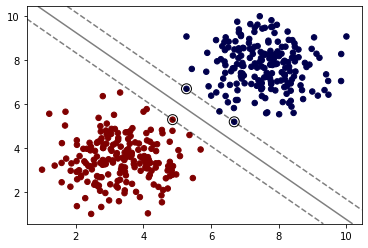

In [24]:
plot_svm_boundary(model, X, y)

In [27]:
model = SVC(kernel='linear', C = 0.005)
model.fit(X,y)

SVC(C=0.005, kernel='linear')

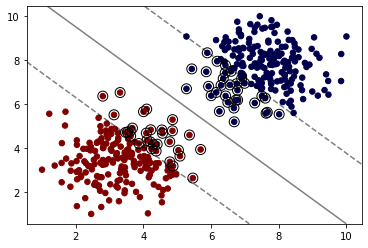

In [28]:
plot_svm_boundary(model, X, y)

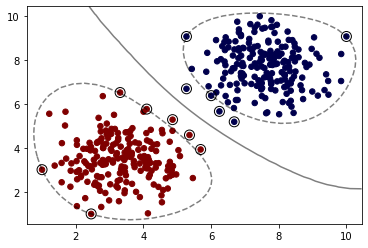

In [34]:
model = SVC(kernel = 'rbf', C = 1, gamma='scale')
model.fit(X,y)
plot_svm_boundary(model, X, y)

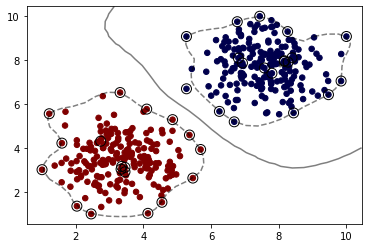

In [36]:
model = SVC(kernel = 'rbf', C = 1, gamma='auto') # Gamma defines how much influence a single training example has. 
model.fit(X,y) 
plot_svm_boundary(model, X, y)

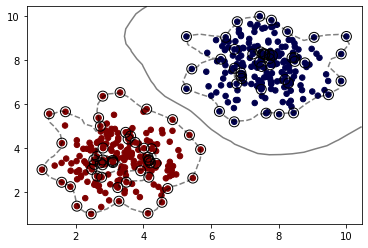

In [41]:
model = SVC(kernel = 'rbf', C = 1, gamma=1)
model.fit(X,y)
plot_svm_boundary(model, X, y)

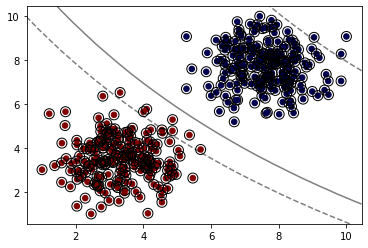

In [42]:
model = SVC(kernel = 'sigmoid') # Looks like sigmoid kernel is not recommended for this dataset because it is relying even on
                                # the innermost points to construct the margins (having them as the support vectors)
model.fit(X,y)
plot_svm_boundary(model, X, y)

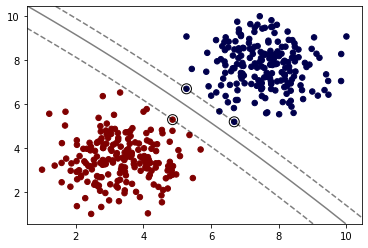

In [53]:
model = SVC(kernel = 'poly', C = 100, degree=5)
model.fit(X,y)
plot_svm_boundary(model, X, y)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [56]:
grid = GridSearchCV(svm, param_grid)

In [57]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [58]:
grid.best_estimator_

SVC(C=0.01, kernel='linear')